In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

In [40]:
data = pd.read_csv('ENERGY-Consumption.csv')
data.head()

,House_IDs,Time_index,Energy_Consumption(per kWh)
0,House_No. 1,2023-07-01 00:00:00,44.076406
1,House_No. 1,2023-07-01 01:00:00,35.546162
2,House_No. 1,2023-07-01 02:00:00,38.028786
3,House_No. 1,2023-07-01 03:00:00,54.127139
4,House_No. 1,2023-07-01 04:00:00,38.282085


In [41]:
data['Time_index'] = pd.to_datetime(data['Time_index'])

In [42]:
teday = data.iloc[0:3*24, 2:3]
print(teday.mean())

daily = data.groupby('House_IDs',sort=0).resample('3D', on='Time_index').mean()
sdaily = data.groupby('House_IDs',sort=0).resample('3D', on='Time_index').std()
daily.head(30)

Energy_Consumption(per kWh)    36.41536
dtype: float64


C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\3811718013.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily = data.groupby('House_IDs',sort=0).resample('3D', on='Time_index').mean()
C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\3811718013.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily = data.groupby('House_IDs',sort=0).resample('3D', on='Time_index').mean()
C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\3811718013.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either speci

Energy_Consumption(per kWh)
House_IDs   Time_index                             
House_No. 1 2023-07-01                    36.415360
            2023-07-04                    35.880309
            2023-07-07                    34.867973
            2023-07-10                    35.623573
            2023-07-13                    34.346658
            2023-07-16                    35.593882
            2023-07-19                    36.037835
            2023-07-22                    35.932411
            2023-07-25                    36.042065
            2023-07-28                    35.250637
            2023-07-31                    36.649847
House_No. 2 2023-07-01                    35.130486
            2023-07-04                    37.174514
            2023-07-07                    36.618057
            2023-07-10                    34.103705
            2023-07-13                    34.534001
            2023-07-16                    33.171037
            2023-07-19                    35.543819
            2023-07-22                    37.503296
            2023-07-25                    34.242991
            2023-07-28                    34.731760
            2023-07-31                    34.703015
House_No. 3 2023-07-01                    34.439983
            2023-07-04                    34.652306
            2023-07-07                    33.693744
            2023-07-10                    34.839877
            2023-07-13                    33.678078
            2023-07-16                    33.411113
            2023-07-19                    36.301045
            2023-07-22                    32.266742

In [43]:
dailytrain = daily.values.reshape((200, -1))
sdailytrain = sdaily.values.reshape((200, -1))
dailytrain.shape
dailytrain

array([[36.41536017, 35.8803086 , 34.86797324, ..., 36.04206491,
        35.25063713, 36.64984675],
       [35.13048608, 37.17451431, 36.61805725, ..., 34.24299077,
        34.73175955, 34.70301511],
       [34.43998255, 34.65230584, 33.69374427, ..., 35.46842861,
        33.60989797, 36.16142604],
       ...,
       [41.36157464, 39.88854575, 40.50519664, ..., 40.85432793,
        41.38014548, 39.15961884],
       [40.02803584, 40.33239857, 43.23914742, ..., 40.29315632,
        39.5836295 , 36.0722705 ],
       [40.30592667, 40.10161145, 39.40869946, ..., 39.84740894,
        40.5483387 , 39.86717421]])

In [44]:
temonth = data.iloc[0:744, 2:3]
print(temonth.mean())
monthly = data.groupby('House_IDs', sort=0).resample('M', on='Time_index').mean()
smonthly = data.groupby('House_IDs', sort=0).resample('M', on='Time_index').std()
monthly

Energy_Consumption(per kWh)    35.632966
dtype: float64


C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\2417976398.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = data.groupby('House_IDs', sort=0).resample('M', on='Time_index').mean()
C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\2417976398.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  monthly = data.groupby('House_IDs', sort=0).resample('M', on='Time_index').mean()
C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\2417976398.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either s

,,Energy_Consumption(per kWh)
House_IDs,Time_index,
House_No. 1,2023-07-31,35.632966
House_No. 2,2023-07-31,35.256904
House_No. 3,2023-07-31,34.298228
House_No. 4,2023-07-31,35.071683
House_No. 5,2023-07-31,35.371640
...,...,...
House_No. 196,2023-07-31,40.187753
House_No. 197,2023-07-31,40.211071
House_No. 198,2023-07-31,40.223351


In [45]:
monthlytrain = monthly.values
smonthlytrain = smonthly.values
monthlytrain.shape

(200, 1)

In [46]:
teweek1 = data.iloc[0:168, 2:3]
print(teweek1.mean())
teweek2 = data.iloc[168:2*168, 2:3]
print(teweek2.mean())
teweek3 = data.iloc[2*168:3*168, 2:3]
print(teweek3.mean())
teweek4 = data.iloc[3*168:4*168, 2:3]
print(teweek4.mean())
teweek5 = data.iloc[4*168:4*168+72, 2:3]
print(teweek5.mean())
teweek6 = data.iloc[4*168+72:4*168+72+168, 2:3]
print(teweek6.mean())

weekly = data.groupby('House_IDs', sort=0).resample('7D', on='Time_index').mean()
sweekly = data.groupby('House_IDs', sort=0).resample('7D', on='Time_index').std()
weekly.head(30)

Energy_Consumption(per kWh)    35.829688
dtype: float64
Energy_Consumption(per kWh)    35.086042
dtype: float64
Energy_Consumption(per kWh)    35.698095
dtype: float64
Energy_Consumption(per kWh)    36.100095
dtype: float64
Energy_Consumption(per kWh)    35.208175
dtype: float64
Energy_Consumption(per kWh)    36.14776
dtype: float64


C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\1922747904.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = data.groupby('House_IDs', sort=0).resample('7D', on='Time_index').mean()
C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\1922747904.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  weekly = data.groupby('House_IDs', sort=0).resample('7D', on='Time_index').mean()
C:\Users\Pacific\AppData\Local\Temp\ipykernel_9356\1922747904.py:14: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Eithe

Energy_Consumption(per kWh)
House_IDs   Time_index                             
House_No. 1 2023-07-01                    35.829688
            2023-07-08                    35.086042
            2023-07-15                    35.698095
            2023-07-22                    36.100095
            2023-07-29                    35.208175
House_No. 2 2023-07-01                    36.147760
            2023-07-08                    35.111358
            2023-07-15                    34.287577
            2023-07-22                    35.476020
            2023-07-29                    35.268338
House_No. 3 2023-07-01                    34.370900
            2023-07-08                    34.613390
            2023-07-15                    34.308344
            2023-07-22                    34.146970
            2023-07-29                    33.722613
House_No. 4 2023-07-01                    35.516583
            2023-07-08                    33.311258
            2023-07-15                    34.902905
            2023-07-22                    36.739252
            2023-07-29                    34.644068
House_No. 5 2023-07-01                    34.606010
            2023-07-08                    35.945516
            2023-07-15                    35.650993
            2023-07-22                    35.342931
            2023-07-29                    35.234233
House_No. 6 2023-07-01                    35.576540
            2023-07-08                    33.766441
            2023-07-15                    33.460551
            2023-07-22                    33.570268
            2023-07-29                    32.979807

In [47]:
weeklytrain = weekly.values.reshape((200, -1))
weeklytrain
sweeklytrain = sweekly.values.reshape((200, -1))

In [48]:
datamodel = np.append(monthlytrain, weeklytrain, axis=1)
datamodel = np.append(datamodel, dailytrain, axis=1)
sdatamodel = np.append(smonthlytrain, sweeklytrain, axis=1)
sdatamodel = np.append(sdatamodel,sdailytrain, axis=1)
datamodel = np.append(datamodel, sdatamodel, axis=1)
datamodel.shape

(200, 34)

array([[<AxesSubplot: title={'center': 'monthlymean'}>,
        <AxesSubplot: title={'center': 'weekly1mean'}>,
        <AxesSubplot: title={'center': 'weekly2mean'}>,
        <AxesSubplot: title={'center': 'weekly3mean'}>,
        <AxesSubplot: title={'center': 'weekly4mean'}>,
        <AxesSubplot: title={'center': 'weekly5mean'}>],
       [<AxesSubplot: title={'center': '3daily1mean'}>,
        <AxesSubplot: title={'center': '3daily2mean'}>,
        <AxesSubplot: title={'center': '3daily3mean'}>,
        <AxesSubplot: title={'center': '3daily4mean'}>,
        <AxesSubplot: title={'center': '3daily5mean'}>,
        <AxesSubplot: title={'center': '3daily6mean'}>],
       [<AxesSubplot: title={'center': '3daily7mean'}>,
        <AxesSubplot: title={'center': '3daily8mean'}>,
        <AxesSubplot: title={'center': '3daily9mean'}>,
        <AxesSubplot: title={'center': '3daily10mean'}>,
        <AxesSubplot: title={'center': '3daily11mean'}>,
        <AxesSubplot: title={'center': 'mont

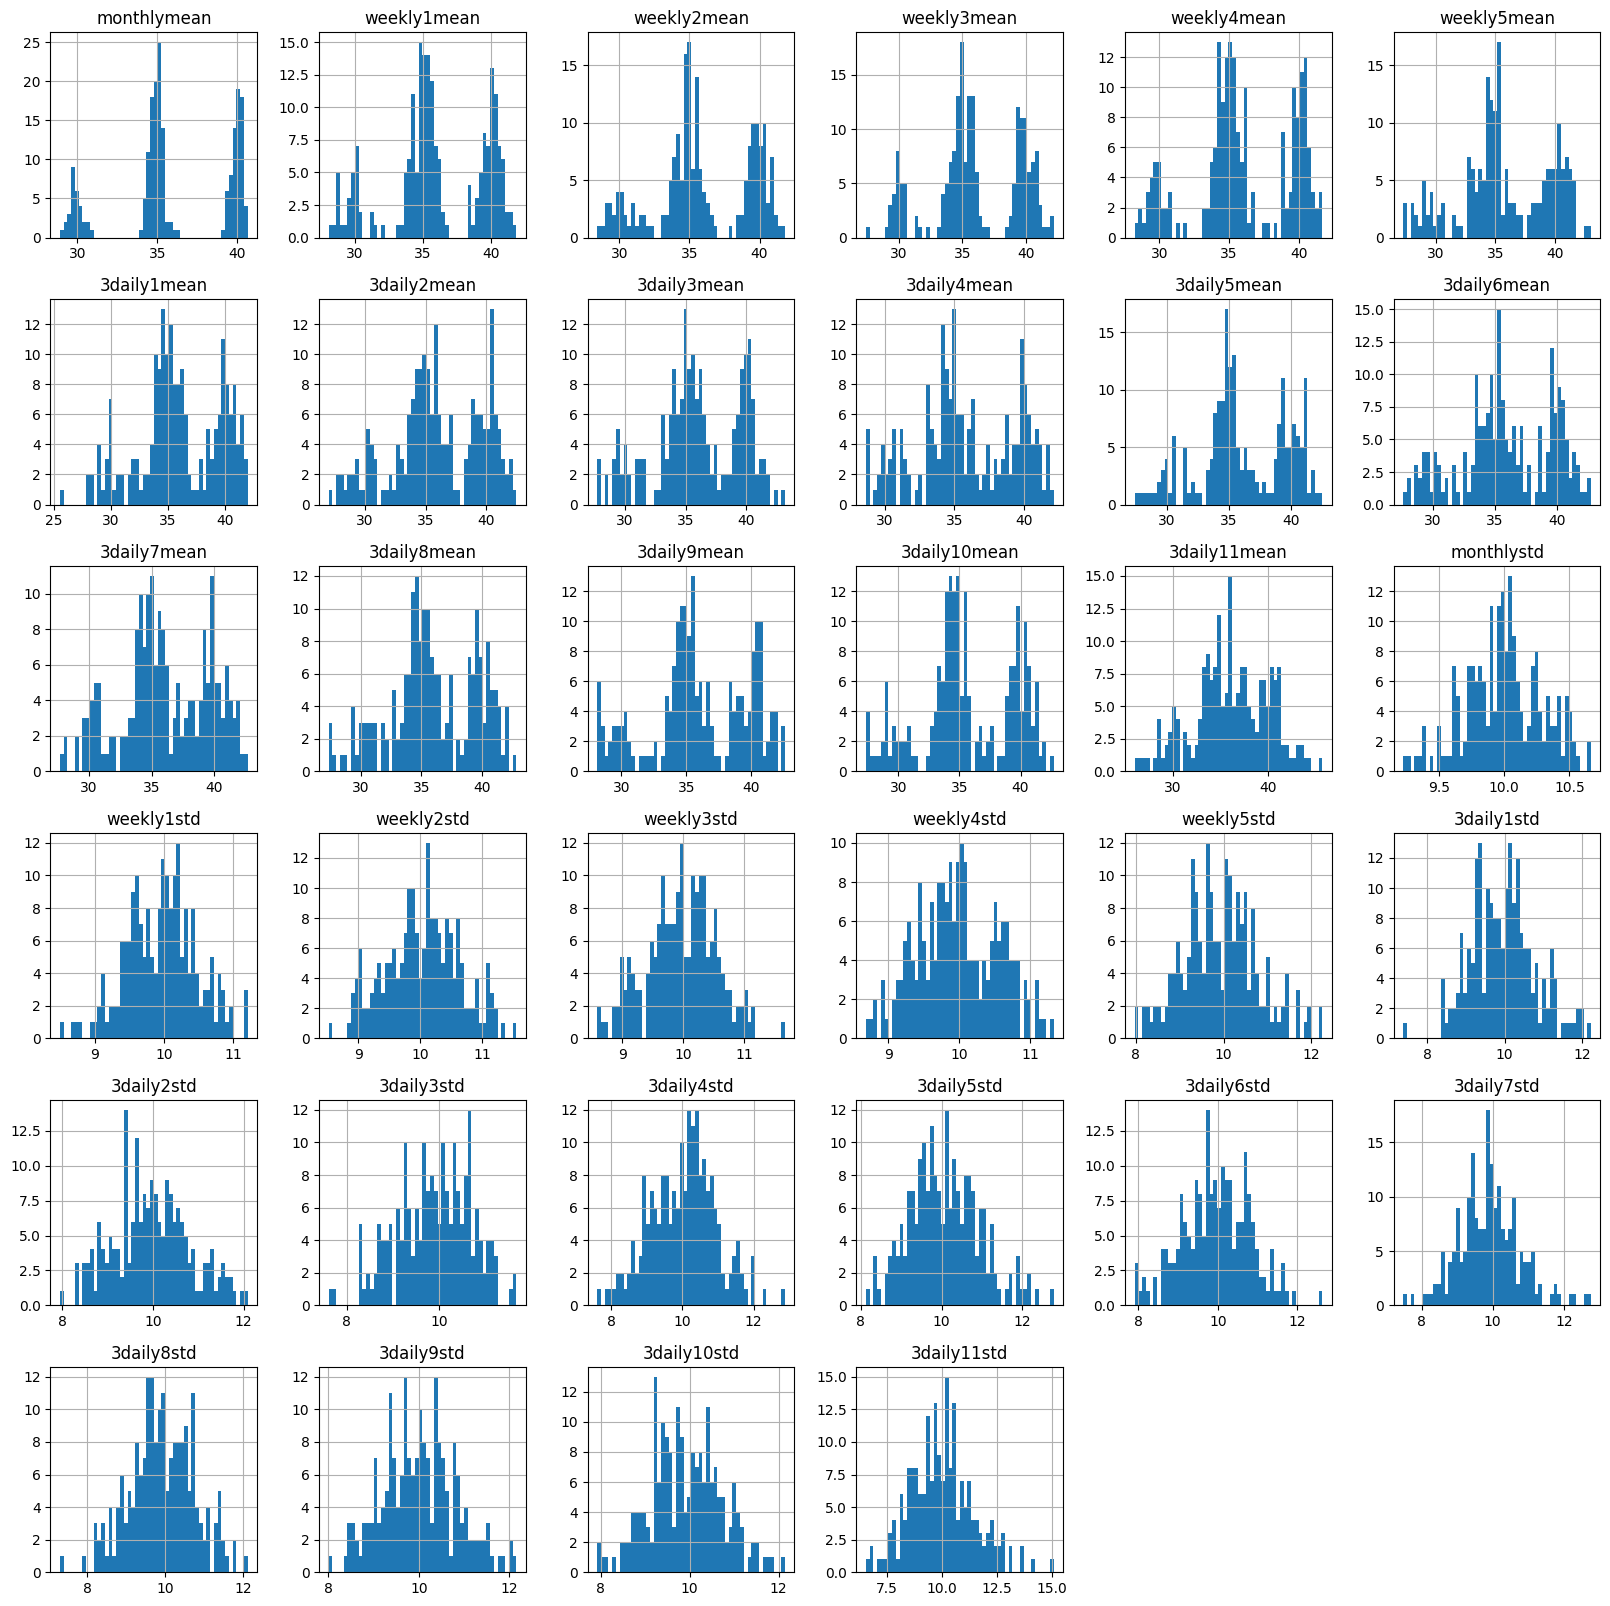

In [49]:
datamodel_df = pd.DataFrame(datamodel, columns=['monthlymean', 'weekly1mean', 'weekly2mean', 'weekly3mean', 'weekly4mean', 'weekly5mean', '3daily1mean', '3daily2mean', '3daily3mean', '3daily4mean', '3daily5mean', '3daily6mean','3daily7mean','3daily8mean','3daily9mean','3daily10mean','3daily11mean', 'monthlystd', 'weekly1std', 'weekly2std', 'weekly3std', 'weekly4std', 'weekly5std', '3daily1std', '3daily2std', '3daily3std', '3daily4std', '3daily5std', '3daily6std','3daily7std','3daily8std','3daily9std','3daily10std','3daily11std' ])
datamodel_df.hist(bins=50, ylabelsize=10, xlabelsize=10, figsize=(20,20))

In [50]:
datamodel_df

,monthlymean,weekly1mean,weekly2mean,weekly3mean,weekly4mean,weekly5mean,3daily1mean,3daily2mean,3daily3mean,3daily4mean,...,3daily2std,3daily3std,3daily4std,3daily5std,3daily6std,3daily7std,3daily8std,3daily9std,3daily10std,3daily11std
0,35.632966,35.829688,35.086042,35.698095,36.100095,35.208175,36.415360,35.880309,34.867973,35.623573,...,9.687973,9.830651,10.436195,9.834164,9.056638,11.902560,9.210368,9.367946,10.387205,9.804947
1,35.256904,36.147760,35.111358,34.287577,35.476020,35.268338,35.130486,37.174514,36.618057,34.103705,...,11.212259,10.461227,8.920595,9.820995,9.377883,9.978319,11.390619,10.495693,11.645507,9.624926
2,34.298228,34.370900,34.613390,34.308344,34.146970,33.722613,34.439983,34.652306,33.693744,34.839877,...,10.524231,10.547692,9.495542,8.889754,10.283939,10.971224,9.945405,9.946982,9.821304,10.656517
3,35.071683,35.516583,33.311258,34.902905,36.739252,34.644068,35.438718,35.025171,34.252982,33.430737,...,9.032913,9.959067,10.715941,9.200772,9.790475,11.337375,8.909138,9.026910,9.839507,7.327352
4,35.371640,34.606010,35.945516,35.650993,35.342931,35.234233,33.878738,34.529907,36.077208,37.079035,...,9.694044,8.867412,11.718679,9.844778,8.958230,9.532675,10.774646,10.557564,10.091022,7.567096
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,40.187753,39.939251,40.130396,40.021654,40.562352,40.414923,38.630859,41.226348,40.263047,38.730188,...,10.387872,9.611604,9.094423,10.244024,11.652280,10.530507,10.589413,11.330630,9.584984,9.082172
196,40.211071,40.428870,40.264267,39.183322,40.826985,40.539702,40.112680,40.441430,41.721139,39.198371,...,9.046908,10.075866,9.856923,10.511228,9.117580,8.886288,10.241072,10.016342,9.989470,7.878659
197,40.223351,40.668761,39.943646,39.242670,40.575134,41.304135,41.361575,39.888546,40.505197,39.919630,...,8.786952,10.071534,11.559576,9.416079,9.289665,9.250905,9.545631,9.730878,9.409274,10.148469
198,39.984087,39.957240,41.282866,39.393476,39.635644,39.207377,40.028036,40.332399,43.239147,40.538376,...,11.322248,9.387745,9.837681,9.714519,10.191075,11.048438,11.067310,10.408177,9.967068,8.594078


In [51]:
datamodel = StandardScaler().fit_transform(datamodel)

In [52]:
pca = PCA(n_components=12)
datamodel_r = pca.fit(datamodel).transform(datamodel)

In [53]:
print('Explained variance ratio from PCA: {}'.format(pca.explained_variance_ratio_))
s = 1 - np.sum(pca.explained_variance_ratio_)
print('information loss is: {}%'.format(s*100))

Explained variance ratio from PCA: [0.4601721  0.10058199 0.06546163 0.06232    0.0520741  0.04263724
 0.03411729 0.03347362 0.02908725 0.02486722 0.02434912 0.02076156]
information loss is: 5.0096885941299245%


c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set th

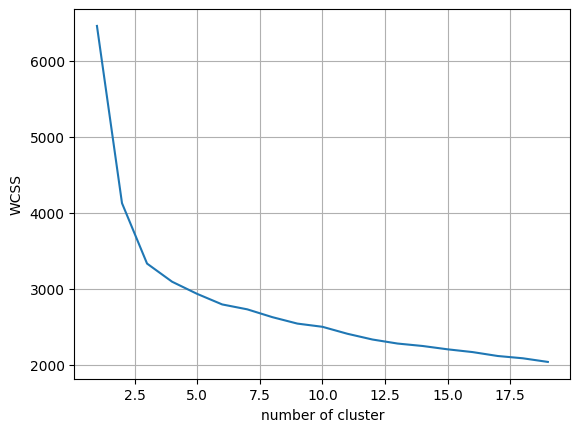

In [54]:
k_range = list(range(1,20))
SSE = []
for k in k_range:
    model = KMeans(n_clusters = k).fit(datamodel_r)
    SSE.append(model.inertia_)
plt.plot(k_range, SSE)
plt.xlabel('number of cluster')
plt.ylabel('WCSS')
plt.grid()
plt.show()

In [55]:
fmodel = KMeans(n_clusters = 3).fit(datamodel_r)
labels = fmodel.labels_

labels.shape

c:\Users\Pacific\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


(200,)

In [56]:
npdf = np.column_stack([datamodel_r, labels])


In [57]:
df = pd.DataFrame(npdf, columns=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', 'labels'])
df


,0,1,2,3,4,5,6,7,8,9,10,11,labels
0,0.220611,-0.935493,-0.641370,-0.078502,-0.236421,-2.552173,-1.947987,1.354892,-0.758249,0.545559,1.093475,-0.526555,2.0
1,0.995555,-2.489038,3.033549,-1.121649,-1.100116,0.486096,0.323713,-0.975748,-0.819442,-0.821539,0.992181,0.016469,2.0
2,1.865131,-0.480665,0.515738,-1.132977,0.483648,-1.360341,0.049495,-1.259093,0.377396,0.272793,0.387809,-1.032632,2.0
3,0.862716,2.456397,-1.242184,-0.542174,2.988345,-0.834244,-1.475833,0.079604,-0.397733,-0.785353,1.434719,-0.421251,2.0
4,0.617999,-0.682571,1.525478,1.873942,0.236668,0.610555,-0.739793,2.762448,0.119462,-0.699158,1.433595,0.032742,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,-4.744780,-2.661481,1.763345,-0.138587,2.371460,0.426084,0.233757,-0.288784,0.121547,0.440954,-1.018467,0.149474,1.0
196,-4.863654,1.404865,0.967438,1.036917,0.067664,1.675708,-0.921728,0.515806,-0.897085,-0.878074,-0.121019,0.022052,1.0
197,-4.937835,1.716616,-1.169757,0.610741,-0.613368,0.483434,-0.568980,0.900648,1.066935,-0.298237,0.251579,-1.051067,1.0
198,-4.341471,-1.955113,1.319776,-0.229139,1.478167,0.067225,1.012103,-0.330639,-0.490008,0.158642,1.600435,-0.037266,1.0


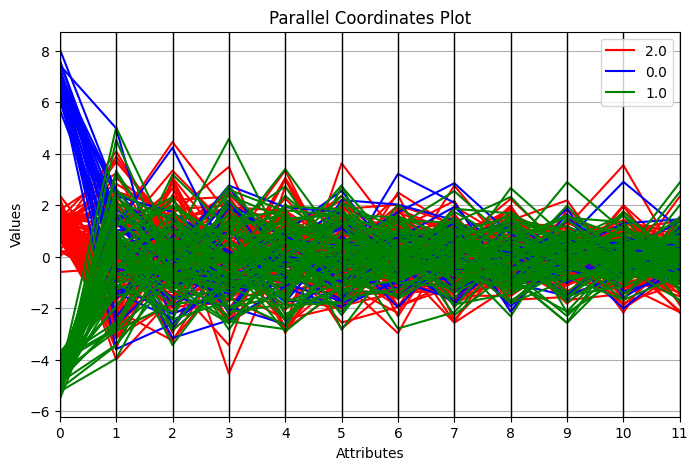

In [58]:
# Plotting parallel coordinates
plt.figure(figsize=(8, 5))
pd.plotting.parallel_coordinates(df, 'labels', color= ['r', 'b', 'g'])

# Adding title and labels
plt.title('Parallel Coordinates Plot')
plt.xlabel('Attributes')
plt.ylabel('Values')

# Display the chart
plt.show()

In [59]:
npdf_label = np.column_stack([datamodel_df, labels])
npdf_label
datamodel_df_label = pd.DataFrame(npdf_label, columns=['monthlymean', 'weekly1mean', 'weekly2mean', 'weekly3mean', 'weekly4mean', 'weekly5mean', '3daily1mean', '3daily2mean', '3daily3mean', '3daily4mean', '3daily5mean', '3daily6mean','3daily7mean','3daily8mean','3daily9mean','3daily10mean','3daily11mean', 'monthlystd', 'weekly1std', 'weekly2std', 'weekly3std', 'weekly4std', 'weekly5std', '3daily1std', '3daily2std', '3daily3std', '3daily4std', '3daily5std', '3daily6std','3daily7std','3daily8std','3daily9std','3daily10std','3daily11std', 'labels' ])

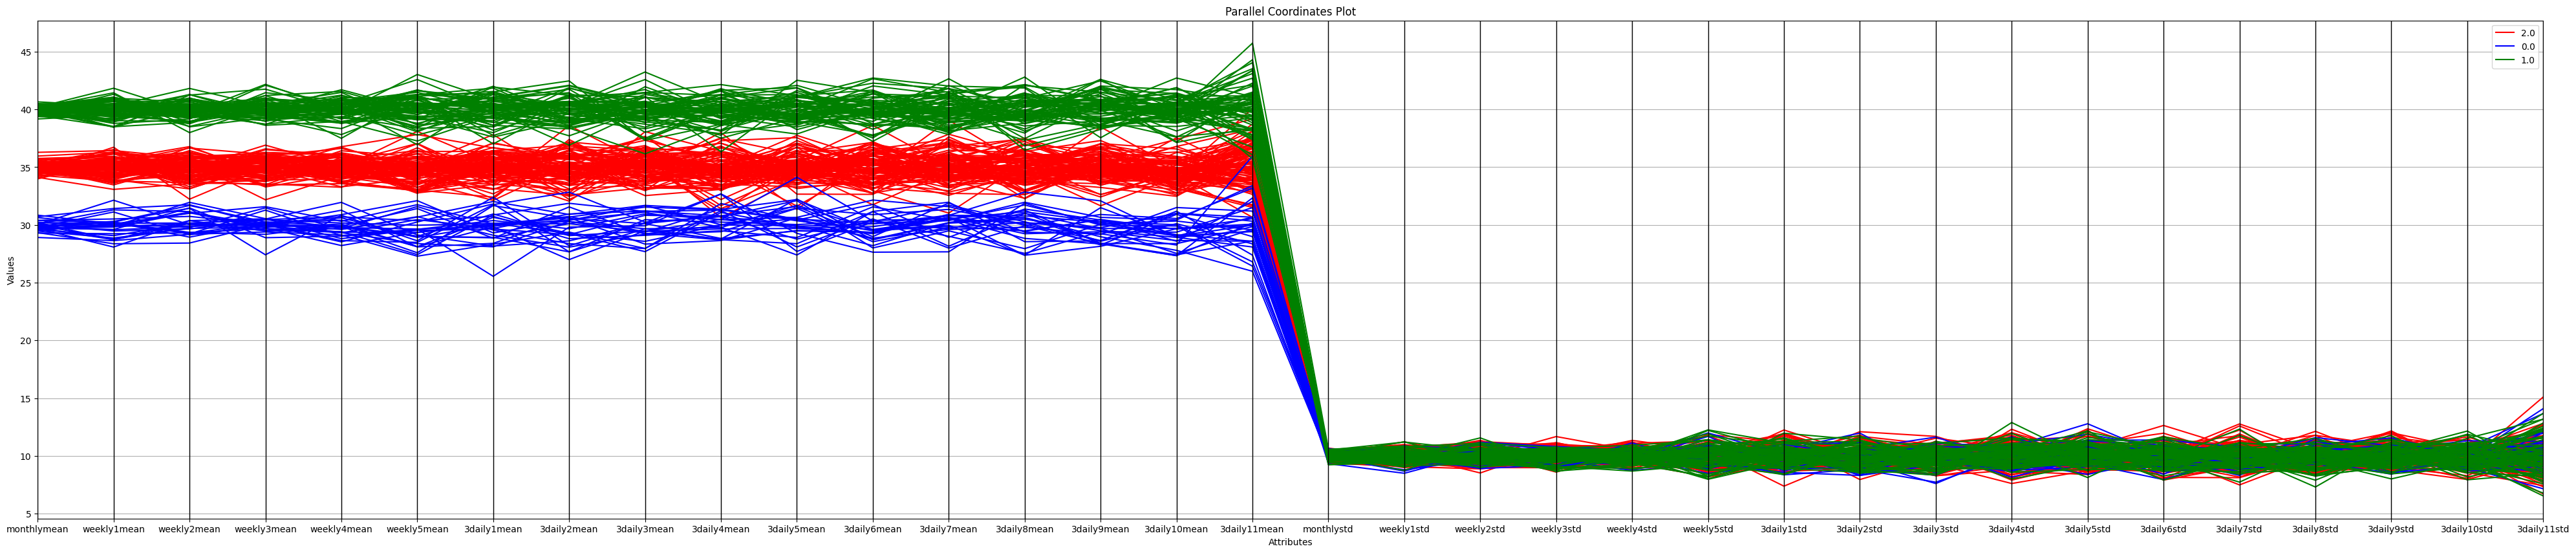

In [63]:
# Plotting parallel coordinates
plt.figure(figsize=(50, 10))
pd.plotting.parallel_coordinates(datamodel_df_label, 'labels', color= ['r', 'b', 'g'])

# Adding title and labels
plt.title('Parallel Coordinates Plot')
plt.xlabel('Attributes')
plt.ylabel('Values')
# Display the chart
plt.show()